# What Are Large Language Models?

Large language models are a type of deep learning model that falls under the umbrella of transformer networks. These networks, introduced by Google in their 2017 paper "**Attention Is All You Need**," utilize a structure designed to understand context and meaning by analyzing the relationships between elements in sequential data, such as words in text.

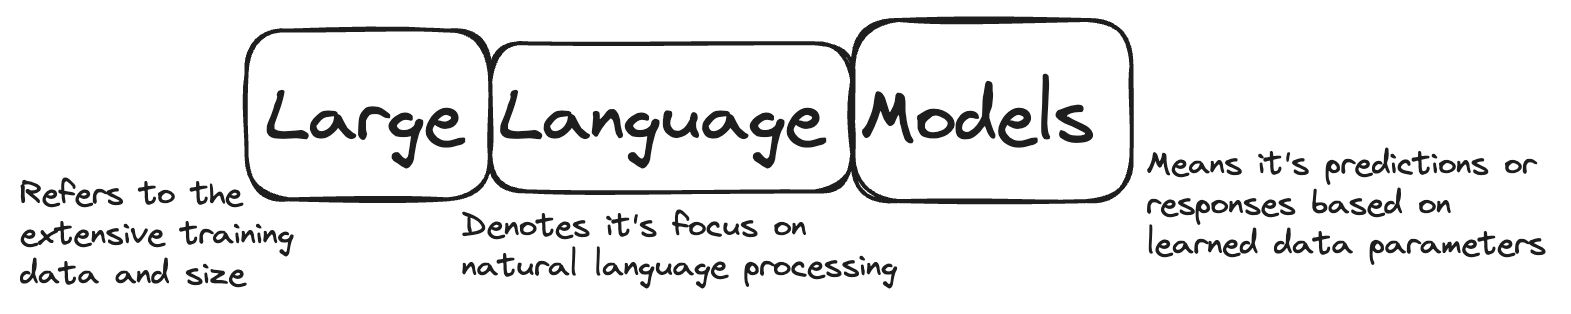

A transformer model consists of various components known as transformer blocks or layers. These include self-attention layers, feed-forward layers, and normalization layers. These layers work in concert to process input and generate predicted outputs during the inference phase. By stacking multiple layers, developers can create deeper and more sophisticated language models capable of handling complex language tasks.

Two key innovations make transformers especially effective for large language models: **positional encodings and self-attention.**

**Positional encodings** provide a way to incorporate the order of inputs in a sequence, allowing the model to process words in a non-linear order. This method contrasts with traditional sequential processing, offering flexibility in how information is fed into the neural network.

**Self-attention**, on the other hand, allows the model to weigh each part of the input differently, highlighting the relevance of specific inputs in relation to others. This means the model doesn't uniformly focus on all data but prioritizes parts that are more significant for the task at hand. The network learns which parts to emphasize over time by analyzing extensive data.

Together, these techniques enable transformers to effectively handle the complex relationships and contexts that occur between elements, even over long distances and in a non-sequential manner.

This capability for non-sequential data processing facilitates the breakdown of complex problems into smaller, simultaneous computations. GPUs are particularly adept at managing these parallel tasks, making them ideal for executing large-scale computations required by expansive, unlabelled datasets and extensive transformer networks.

## Impact of Large Language Models

Large language models have significantly simplified the process of building and deploying various machine learning tasks. These models excel in understanding and generating human-like text.

They are especially useful for tasks like **classification**, where they can categorize information; **translation**, where they convert text from one language to another; and other natural language processing (NLP) tasks such as **summarization**, which involves condensing large amounts of text into concise summaries, and **sentiment analysis**, which identifies the emotional tone behind a series of words.

What's really exciting about these models is that they learn from vast amounts of data to understand language patterns and nuances. This means they can assist in automating and enhancing tasks that would typically require human input, thereby saving time and increasing efficiency in fields ranging from customer service to content creation.

### Development Cycle Before Large Language Models

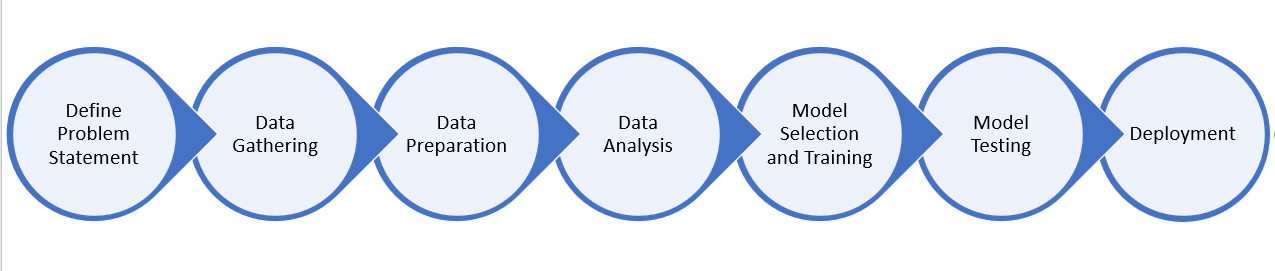


# Development with LLM's

### Installing Dependencies

In [ ]:
!pip install transformers
!pip install sentencepiece
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 6.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## Importing Dependencies

In [ ]:
import torch                        # allows Tensor computation with strong GPU acceleration
from transformers import pipeline   # fast way to use pre-trained models for inference
import os

In [ ]:
# load model
dolly_pipeline = pipeline(model="databricks/dolly-v2-3b",
                            torch_dtype=torch.bfloat16,
                            trust_remote_code=True,
                            device_map="auto")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

instruct_pipeline.py:   0%|          | 0.00/9.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/databricks/dolly-v2-3b:
- instruct_pipeline.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/5.68G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## NLP Tasks With LLM's

### Sentiment Analysis

A company monitors tweets mentioning their brand to gauge public sentiment. They can use models to classify these tweets as positive, negative, or neutral.

In [ ]:
# define helper function

def get_completion_dolly_sentiment(input):
  system = f"""
  You are an expert in natural language processing tasks, classify this text into either positive, negative, or neutral.
  """
  prompt = f"#### System: {system}\n#### User: \n{input}\n\n#### Response from Dolly-v2-3b:"
  print(prompt)
  dolly_response = dolly_pipeline(prompt,max_new_tokens=500)
  return dolly_response[0]["generated_text"]

In [ ]:
# let's prompt
tweet = "I love the new update for the app; it's smoother and more intuitive than ever!"
print(get_completion_dolly_sentiment(tweet))

#### System: 
  You are an expert in natural language processing tasks, classify this text into either positive, negative, or neutral.
  
#### User: 
I love the new update for the app; it's smoother and more intuitive than ever!

#### Response from Dolly-v2-3b:


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Positive


In [ ]:
tweet = "I'm extremely disappointed with this product and is not worth the price at all."
print(get_completion_dolly_sentiment(tweet))

#### System: 
  You are an expert in natural language processing tasks, classify this text into either positive, negative, or neutral.
  
#### User: 
I'm extremely disappointed with this product and is not worth the price at all.

#### Response from Dolly-v2-3b:
Positive


### Summarization

In [ ]:
# define helper function

def get_completion_dolly_summarization(input):
  system = f"""
  Read the text and summarize the text in less than 25 words- .
  """
  prompt = f"#### System: {system}\n#### User: \n{input}\n\n#### Response from Dolly-v2-3b:"
  print(prompt)
  dolly_response = dolly_pipeline(prompt,max_new_tokens=500)
  return dolly_response[0]["generated_text"]

In [ ]:
text = "The new EcoSmart Blender combines efficiency with sustainability. Its motor is optimized to reduce energy consumption by 30% without sacrificing power. The blades are crafted from recycled stainless steel, and the sleek, compact design minimizes its carbon footprint. Ideal for eco-conscious consumers looking to blend sustainability with everyday convenience."
print(get_completion_dolly_summarization(text))

#### System: 
  Read the text and summarize the text in less than 25 words- .
  
#### User: 
The new EcoSmart Blender combines efficiency with sustainability. Its motor is optimized to reduce energy consumption by 30% without sacrificing power. The blades are crafted from recycled stainless steel, and the sleek, compact design minimizes its carbon footprint. Ideal for eco-conscious consumers looking to blend sustainability with everyday convenience.

#### Response from Dolly-v2-3b:
EcoSmart Blender combines efficiency with sustainability. Its motor is optimized to reduce energy consumption by 30% without sacrificing power. The blades are crafted from recycled stainless steel, and the sleek, compact design minimizes its carbon footprint.


# Other Usages -

In [ ]:
# define helper function

def get_completion_dolly(input):

  system = f"""
  You are an expert Physicist.
  You are good at explaining Physics concepts in simple words.
  Help as much as you can.
  """
  prompt = f"#### System: {system}\n#### User: \n{input}\n\n#### Response from Dolly-v2-3b:"

  print(prompt)

  dolly_response = dolly_pipeline(prompt,max_new_tokens=500)
  return dolly_response[0]["generated_text"]

In [ ]:
# let's prompt
prompt = "Explain the difference between nuclear fission and fusion."
print(get_completion_dolly(prompt))

#### System: 
  You are an expert Physicist.
  You are good at explaining Physics concepts in simple words.
  Help as much as you can.
  
#### User: 
Explain the difference between nuclear fission and fusion.

#### Response from Dolly-v2-3b:
Nuclear fission: occurs when a subatomic particle is split in two and fission occurs in the nucleus. This releases large amounts of energy that is released as light in the form of radiation, such as x-rays or gamma rays. Nuclear fission can be the underlying cause of a nuclear reaction, like the splitting of a piece of Uranium into Uranium nuclei that move fast enough to collide with one another and form larger nuclei, like a heavy water nucleus or a plutonium nucleus. 

Nuclear fusion: occurs when two or more atomic nuclei combine to form one or more atomic nuclei, with a total mass slightly greater than that of the sum of the atomic masses. Nuclear fusion releases much less energy per unit of material processed than does nuclear fission. For exam

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl

In [ ]:
import gradio as gr

# build an app front-end / ai tool with Gradio
iface = gr.Interface(fn=get_completion_dolly, inputs=[gr.Textbox(label="Insert Prompt Here",lines=6)],
                     outputs=[gr.Textbox(label="Your Answer Here",lines=3)],
                     title="My AI Physics Teacher",
                     examples=["Explain the difference between nuclear fusion and fission.",
                              "Why is the Sky blue?"]
                     )
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f84666480f09b23c75.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
iface.close()

# Limitations of Large Language Models

 Limitation of traditional language models that solely rely on pre-trained knowledge. These models can generate responses based on patterns they learned during training but might not access or incorporate specific, factual, or up-to-date information during inference. This can lead to responses that are generic, factually incorrect, or outdated.

# Retrieval-Augmented Generation (RAG)

RAG is designed to enhance the capability of language models by augmenting them with external knowledge retrieved from a large corpus of text.


### How RAG Works

RAG combines the power of language models with the specificity and breadth of external data sources. The process involves two main components:

1. **Retrieval**: The model queries a large external dataset, typically a corpus like Wikipedia or a specially curated database. This retrieval is based on the input query to find the most relevant documents or text snippets that could contain useful information to answer the query or complete the task.

2. **Augmentation**: Once the relevant documents are retrieved, the language model integrates this information into its response generation process. This usually involves a mechanism like attention or concatenation to blend the contextual data from the retrieved documents with the generative capabilities of the language model.

### Benefits of RAG

- **Increased Accuracy**: By pulling in relevant external information, RAG models can provide more accurate and contextually appropriate responses, especially for fact-based queries.
- **Scalability**: Instead of needing to constantly retrain a model with new data, a RAG model can dynamically pull in the most relevant and current data from its external sources.
- **Flexibility**: RAG can be adapted to different domains or types of data by simply changing the dataset it retrieves from, making it versatile across various applications.

RAG models essentially allow language models to "think" and "research" like a human might by looking up information before responding, thus overcoming some of the inherent limitations of fixed training data. This makes them particularly useful in applications requiring high accuracy and up-to-date information, such as in AI chatbots, research tools, and interactive educational platforms.